In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [4]:
df = pd.read_csv('../datasets/normalized/unsupervised_learning/final_teams_dataset.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,1252.750000
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,1686.000000
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,1670.000000
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,1572.500000
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,1625.500000
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,1723.000000
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,1185.000000
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,1778.750000
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,1509.250000
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,1521.500000


In [49]:
# standard scaler
from sklearn.preprocessing import StandardScaler

X = np.array(df[['Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.07883685e+00,  9.69373861e-01,  1.05573639e+00,
         8.76437127e-01,  1.35278565e+00, -6.40162175e-01,
        -7.63065427e-01, -5.17649690e-01, -1.02414703e+00],
       [-3.47981837e-01, -1.78267289e-02,  1.52481788e-01,
        -2.55207942e-01, -2.45963515e-01,  2.30548905e-01,
        -9.50245950e-02,  4.44485259e-01,  6.33249685e-01],
       [-3.38835564e-01, -1.78267289e-02,  1.00119203e-01,
         5.62244614e-04, -3.26984537e-02,  1.00960619e+00,
         9.11877528e-01, -2.25285587e-02,  5.72041728e-01],
       [-2.03928027e-01, -6.36668890e-01, -6.91864902e-01,
        -5.09138054e-01, -7.08694521e-02, -1.58979736e-01,
        -1.24069849e-01,  2.41247764e-01,  1.99055739e-01],
       [-9.07047814e-01, -5.04059855e-01, -4.75869237e-01,
        -1.43929510e+00, -1.20417871e+00, -1.58979736e-01,
         1.66382687e-01,  1.30067726e+00,  4.01807097e-01],
       [-1.84339758e+00, -7.84012261e-01, -1.02567638e+00,
        -1.35925191e+00, -1.47383834e+00,  1.467875

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/P

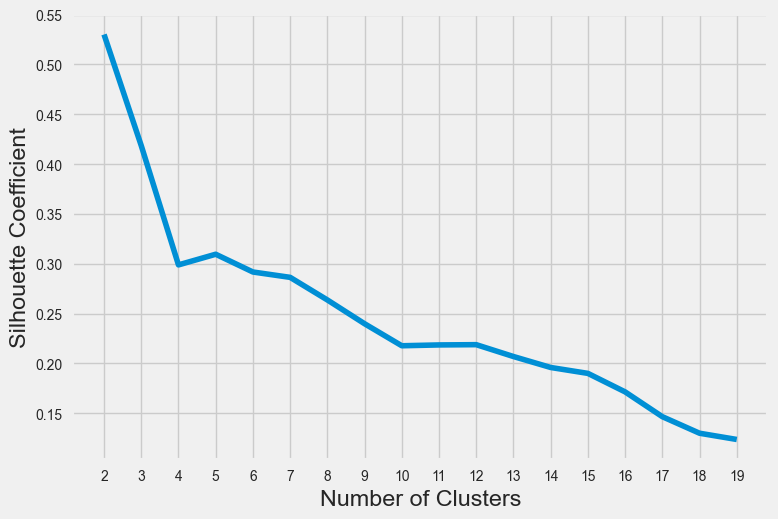

In [56]:
# To get silhouette_score

from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 20):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(scaled_X)
    labels = model.labels_
    score = silhouette_score(scaled_X, model.labels_)
    silhouette_coefficients.append(score)
    
# plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# By silhouette score, 2 or 3 is the optimal number of clusters. But it doens not seem to be the optimal number since it is too small. So I will choose 5 or 7

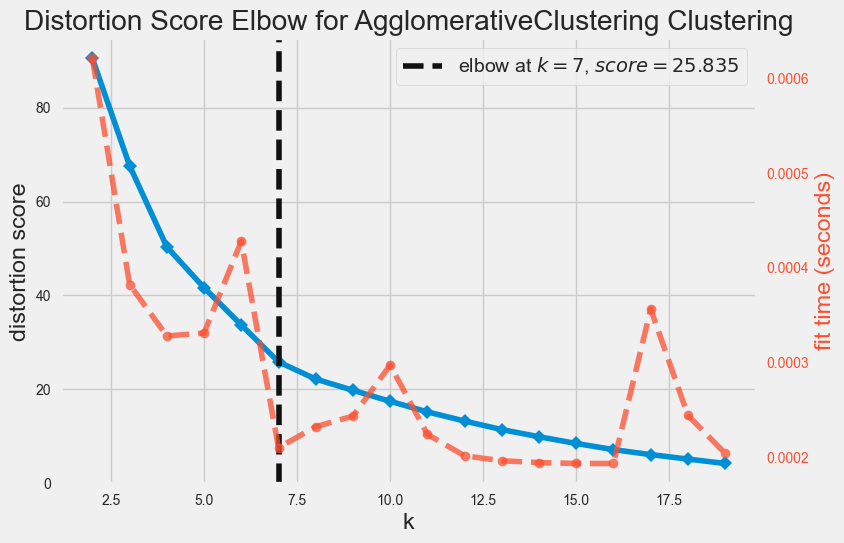

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from yellowbrick.cluster import KElbowVisualizer

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

In [ ]:
# By elbow method, 4 or 7 are the best ones.

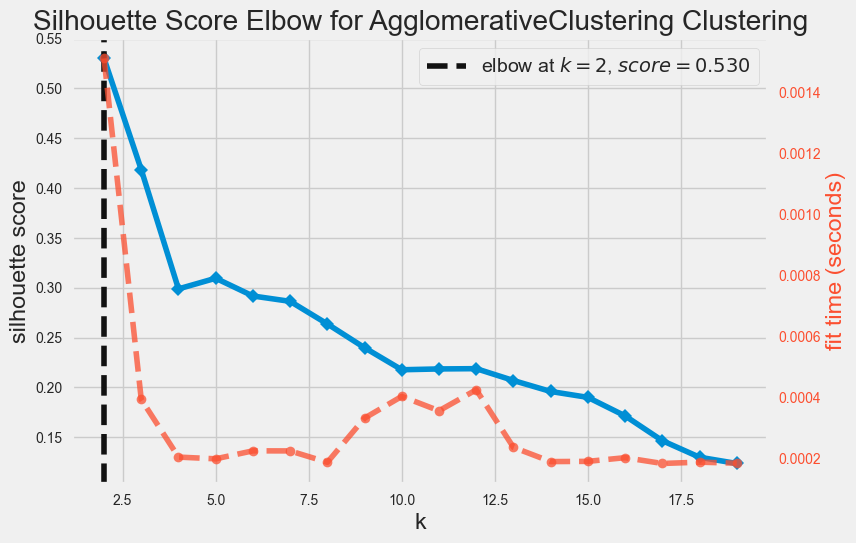

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [53]:
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

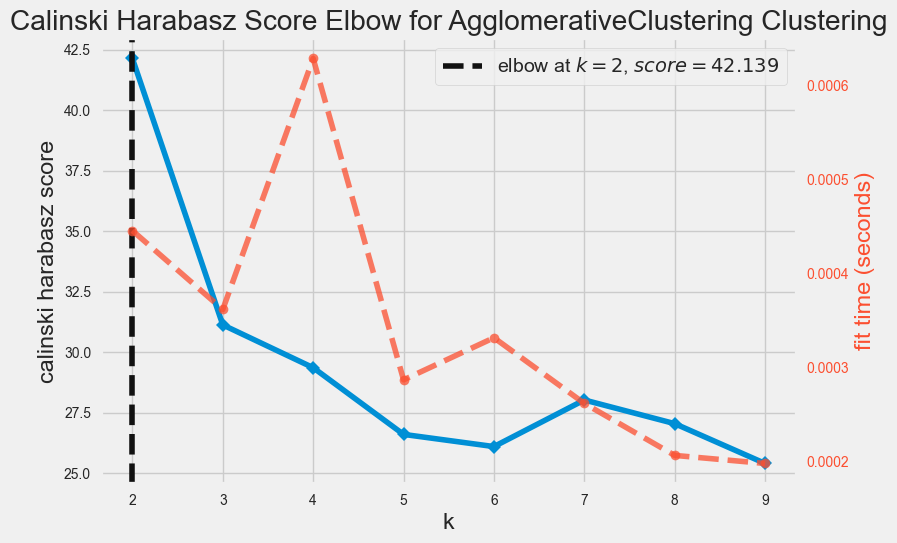

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [54]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

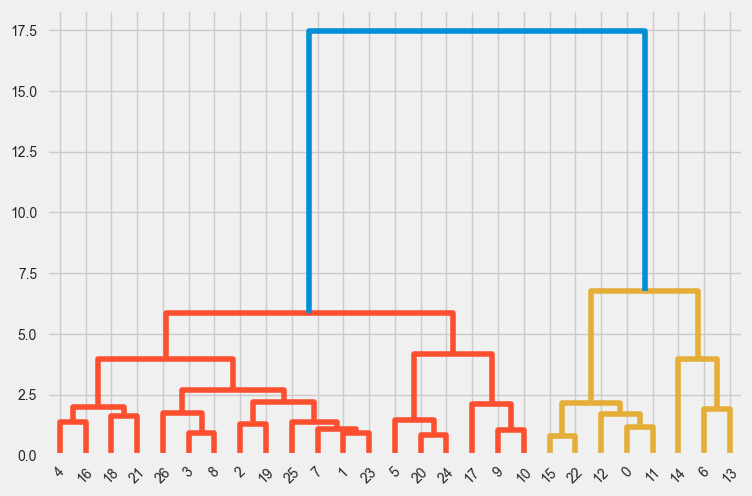

In [55]:
dendrogram = sch.dendrogram(sch.linkage(scaled_X, method='ward'))

In [ ]:
# 7 it the best one according to the metrics.

In [59]:
### visualize silhouette score
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

 
    for ind, n_cluster in enumerate(cluster_lists):

        model = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward')
        model.fit(scaled_X)
        cluster_labels = model.labels_

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/1108232/P

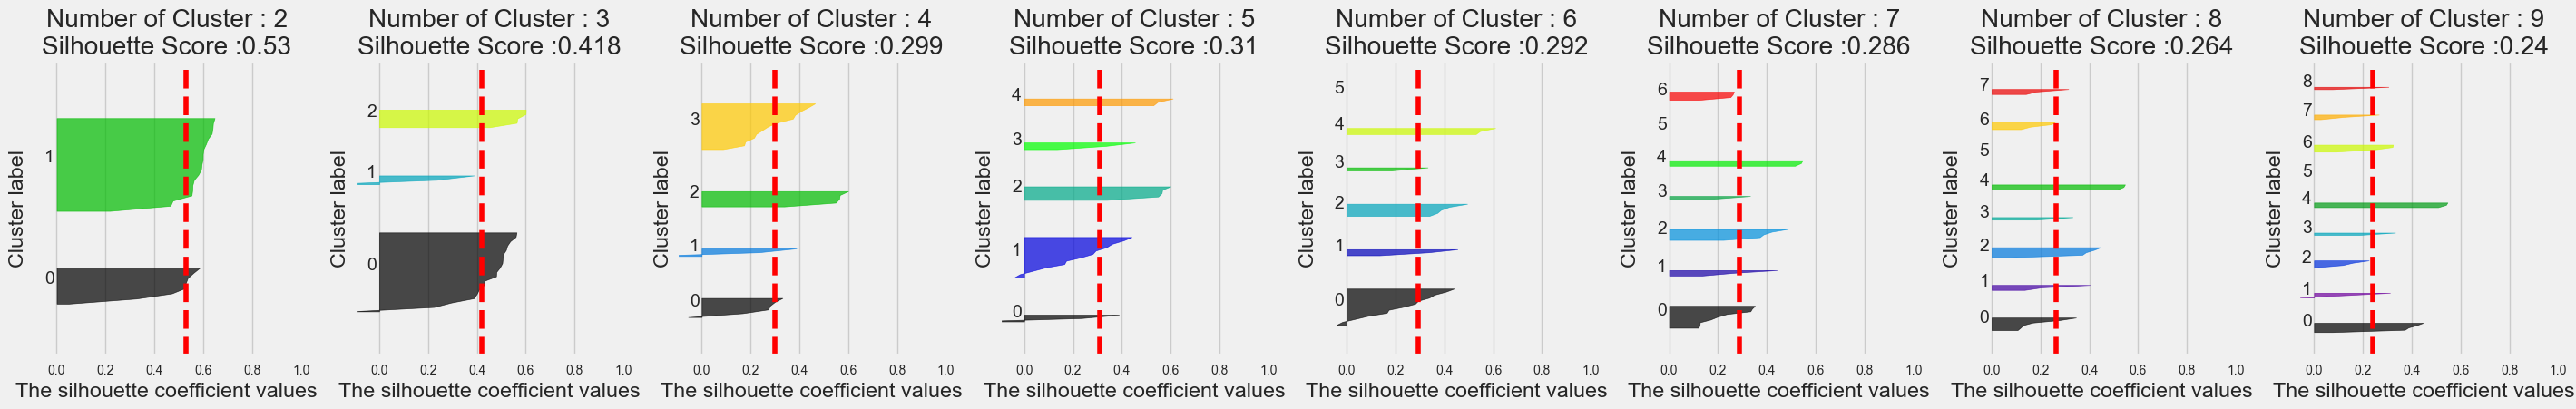

In [60]:
visualize_silhouette(range(2,10), scaled_X)

In [ ]:
# ...

In [7]:
OPTIMAL_N_CLUSTERS = 7

model = AgglomerativeClustering(n_clusters=OPTIMAL_N_CLUSTERS, affinity='euclidean', linkage='ward')
df['cluster'] = model.fit_predict(scaled_X)



NameError: name 'scaled_X' is not defined

In [62]:
df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded,cluster
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,1252.750000,2
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,1686.000000,0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,1670.000000,0
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,1572.500000,0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,1625.500000,6
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,1723.000000,4
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,1185.000000,3
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,1778.750000,0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,1509.250000,0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,1521.500000,1


In [5]:
# print(df['cluster'].value_counts())

df.to_csv('../datasets/labeled_after_clustering/agglomerative/team_stats_with_label.csv')

In [6]:
# interpretation
# To evaluate, we convert the unsupervised clustering problem into a One-vs-all supervised classification problem.
for i in range(OPTIMAL_N_CLUSTERS):
    mapper = {c: 1 if i == c else 0 for c in range(OPTIMAL_N_CLUSTERS)}
    df[f'cluster {i}'] = df['cluster'].map(mapper)
df

NameError: name 'OPTIMAL_N_CLUSTERS' is not defined

In [64]:
features = ['Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']

# train a classifier and get feature importances
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
feature_importances = []
feature_columns = ['cluster','feature_name','feature_importance']
df_fi = pd.DataFrame(columns=feature_columns)
for i in range(OPTIMAL_N_CLUSTERS):
    clf.fit(df[features].values, df[f"cluster {i}"].values)
    
    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

    # Get the most important features names and weights
    most_important_features = np.take_along_axis(
        np.array(df.iloc[:, 2:24].columns.tolist()), 
        sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)
    

    # Show
    feature_importances.append(list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi_cluster = pd.DataFrame(columns=feature_columns, data=list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi = pd.concat([df_fi, df_fi_cluster])
    
feature_importances


[[(0, 'PrgP', 0.2202005569130757),
  (0, 'Gls', 0.18520311577414192),
  (0, 'Poss', 0.17725291494037318),
  (0, 'Ast', 0.10272808983592564),
  (0, 'PrgC', 0.09281313002517033),
  (0, 'PrgC_Conceded', 0.06917420202719056),
  (0, 'Ast_Conceded', 0.05747270196029693),
  (0, 'PrgP_Conceded', 0.056472734755784286),
  (0, 'Gls_Conceded', 0.03868255376804138)],
 [(1, 'Gls', 0.3773195107383492),
  (1, 'Ast', 0.2541955781695682),
  (1, 'Gls_Conceded', 0.1249552235963805),
  (1, 'Ast_Conceded', 0.05364484171140379),
  (1, 'Poss', 0.05083194841912906),
  (1, 'PrgC_Conceded', 0.04356633305543148),
  (1, 'PrgP_Conceded', 0.0405455593263751),
  (1, 'PrgC', 0.03286208211331475),
  (1, 'PrgP', 0.022078922870047927)],
 [(2, 'Poss', 0.18552955724072462),
  (2, 'Ast', 0.17314018718640153),
  (2, 'Gls', 0.1647356598472011),
  (2, 'PrgP_Conceded', 0.1160999364817261),
  (2, 'PrgP', 0.11056169557916534),
  (2, 'PrgC', 0.1099155629181846),
  (2, 'Gls_Conceded', 0.05299964930115254),
  (2, 'Ast_Conceded', 0.0

In [65]:
# visualize feature importance
import altair as alt

alt.Chart(df_fi).mark_rect().encode(
    x='cluster:O',
    y='feature_name:N',
    color='feature_importance:Q'
).properties(
    width=800,
    height=800
).configure_axis(
    labelFontSize=20
)


alt.Chart(...)

In [66]:
final_chart = alt.vconcat()
row_chart = alt.hconcat()

for i in range(OPTIMAL_N_CLUSTERS):
    df_cluster = df_fi[df_fi['cluster'] == i]
    base = alt.Chart(df_cluster, title=f'Cluster {i}').encode(
        x='feature_importance:Q',
        y=alt.Y('feature_name:N').sort('-x'),
        text=alt.Text('feature_importance:Q', format=".3"),
        color=alt.condition(
            alt.datum.feature_importance > 0.12,
            alt.value("orange"),
            alt.value('skyblue')
        )
    )

    bar = base.mark_bar().properties(
        width=200,
        height=800,
    )

    text = base.mark_text(align='left', dx=2)

    chart = (bar + text)
    if i == 0 :
        row_chart = chart
    elif i == 4:
        final_chart = alt.vconcat(final_chart, row_chart) 
        row_chart = chart
    else :
        row_chart = alt.hconcat(row_chart, chart)

final_chart = alt.vconcat(final_chart, row_chart)
    
final_chart.configure_title(
        fontSize=24,
    ).configure_axis(
        labelFontSize=20,
        titleFontSize=24,
    ).configure_text(
        fontSize=20
    )

alt.VConcatChart(...)

In [107]:
## add 2022 standings to original data frame
df_standing = pd.read_csv('../datasets/normalized/unsupervised_learning/2022_team_standing.csv')
final_df = df.merge(df_standing, on='Team', how='left')
final_df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 3,cluster 4,cluster 5,cluster 6,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,...,0,0,0,0,5.0,69.0,0.0,1.0,0.0,0.0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,0,1,18.0,35.0,0.0,0.0,0.0,1.0
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,...,1,0,0,0,3.0,74.0,1.0,0.0,0.0,0.0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_to_viz = final_df.replace(np.NaN, -1)
df_to_viz

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 3,cluster 4,cluster 5,cluster 6,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,...,0,0,0,0,5.0,69.0,0.0,1.0,0.0,0.0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,0,1,18.0,35.0,0.0,0.0,0.0,1.0
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,...,0,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,...,1,0,0,0,3.0,74.0,1.0,0.0,0.0,0.0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,...,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [122]:
def get_tournament_type(row):
    if row['champions'] == 1:
        return 'UEFA Champions'
    if row['europa'] == 1:
        return 'EUROPA League'
    if row['europa_conference'] == 1:
        return 'EUROPA Conference'
    if row['relegation'] == 1:
        return 'Relegated next season'
    if row['relegation'] == -1:
        return 'Relegated before this season'
    return 'N/A'
    
df_to_viz['tournament_type'] = df_to_viz.apply(lambda x : get_tournament_type(x), axis=1)

In [123]:
df_to_viz

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 4,cluster 5,cluster 6,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation,tournament_type
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,...,0,0,0,5.0,69.0,0.0,1.0,0.0,0.0,EUROPA League
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0,N/A
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0,N/A
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,1,18.0,35.0,0.0,0.0,0.0,1.0,Relegated next season
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,...,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,...,0,0,0,3.0,74.0,1.0,0.0,0.0,0.0,UEFA Champions
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0,N/A
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0,N/A
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season


In [127]:
# to check the each cluster's characteristics
palette = alt.Scale(domain=['UEFA Champions', 'EUROPA League', 'EUROPA Conference', 'N/A', 'Relegated next season', 'Relegated before this season'],
                  range=['darkblue', 'blue', 'lightblue', 'grey', 'orange', 'tomato'])

alt.Chart(df_to_viz).mark_bar().encode(
    x=alt.X('count(Team)').stack("normalize"),
    y='cluster:N',
    color=alt.Color('tournament_type:N', scale=palette),
).properties(
    width=600,
    height=300,
    title='The proportion of the tournament type per cluster'
).configure_title(
        fontSize=24,
).configure_axis(
    labelFontSize=20,
    titleFontSize=24,
).configure_text(
    fontSize=20
).configure_legend(
    titleFontSize=18,
    labelFontSize=15
) 

alt.Chart(...)

In [125]:
# cluster 3,5 are the strongest teams
# cluster 4 only includes already relegated teams.
# cluster 1,6 are weaker teams in the EPL league.


In [133]:
df_to_viz[df_to_viz['cluster']==0]

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 4,cluster 5,cluster 6,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation,tournament_type
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0,N/A
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0,N/A
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0,N/A
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0,N/A
19,Southampton,19,48.900000,44.500000,28.750000,637.750000,1368.000000,61.000000,44.250000,642.750000,...,0,0,0,15.0,40.0,0.0,0.0,0.0,0.0,N/A
23,Watford,23,46.433333,42.666667,29.000000,604.333333,1305.666667,60.000000,39.333333,763.666667,...,0,0,0,19.0,23.0,0.0,0.0,0.0,1.0,Relegated next season
25,West Ham,25,45.275000,52.000000,36.000000,644.500000,1329.000000,55.750000,42.750000,847.750000,...,0,0,0,7.0,56.0,0.0,0.0,1.0,0.0,EUROPA Conference
26,Wolves,26,48.133333,43.000000,30.000000,800.333333,1323.666667,43.333333,31.333333,716.666667,...,0,0,0,10.0,51.0,0.0,0.0,0.0,0.0,N/A


In [134]:
# to plot the final points distribution per cluster
alt.Chart(df_to_viz).mark_boxplot(color="tomato").encode(
    x=alt.X('cluster:N'),
    y=alt.Y('final_point_2022:Q', scale=alt.Scale(zero=False))
).properties(
    width=600,
    height=400,
    title="Distribution of final_point per cluster"
).configure_title(
        fontSize=24,
).configure_axis(
    labelFontSize=20,
    titleFontSize=24,
).configure_text(
    fontSize=20
)

alt.Chart(...)


*--- PCA Report ---*

X mean:		-0.000
X variance:	1.000
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 9 to 3 dimensions while retaining 95% of variance.
2 principal components explain 92.30% of variance.
3 principal components explain 96.00% of variance.
X*X_pca: (9, 27) * (27, 9) = (9, 9)


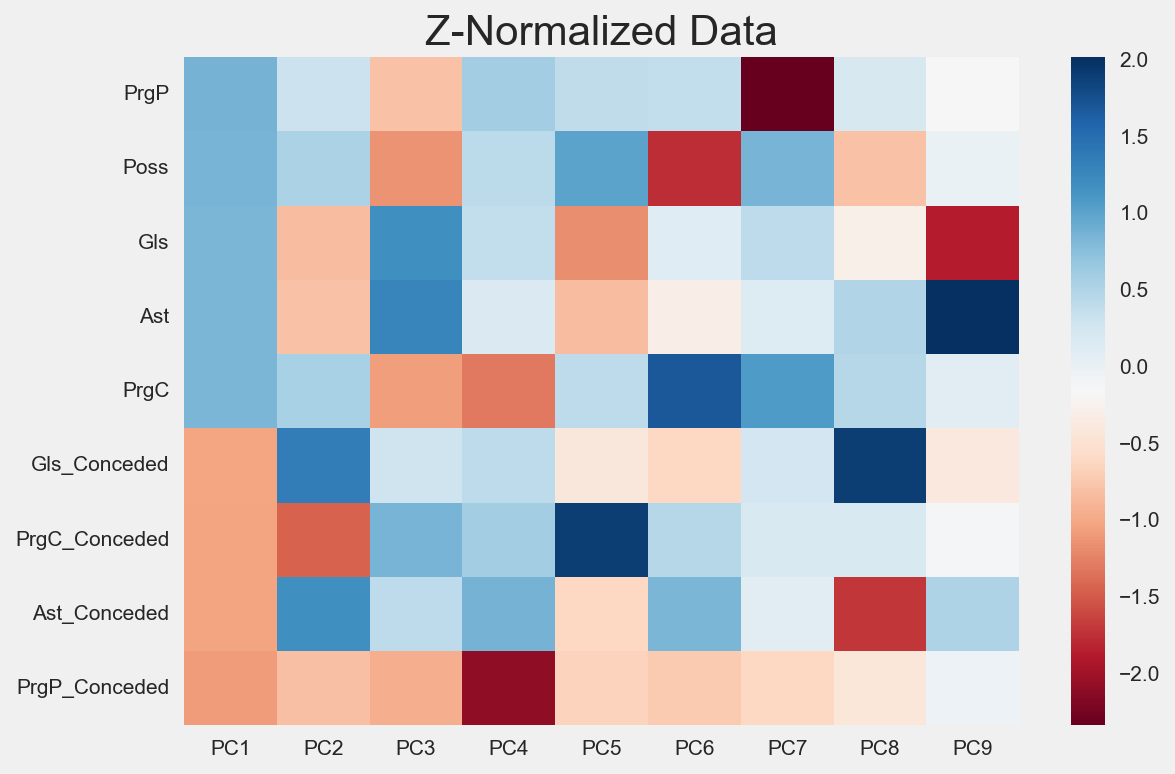

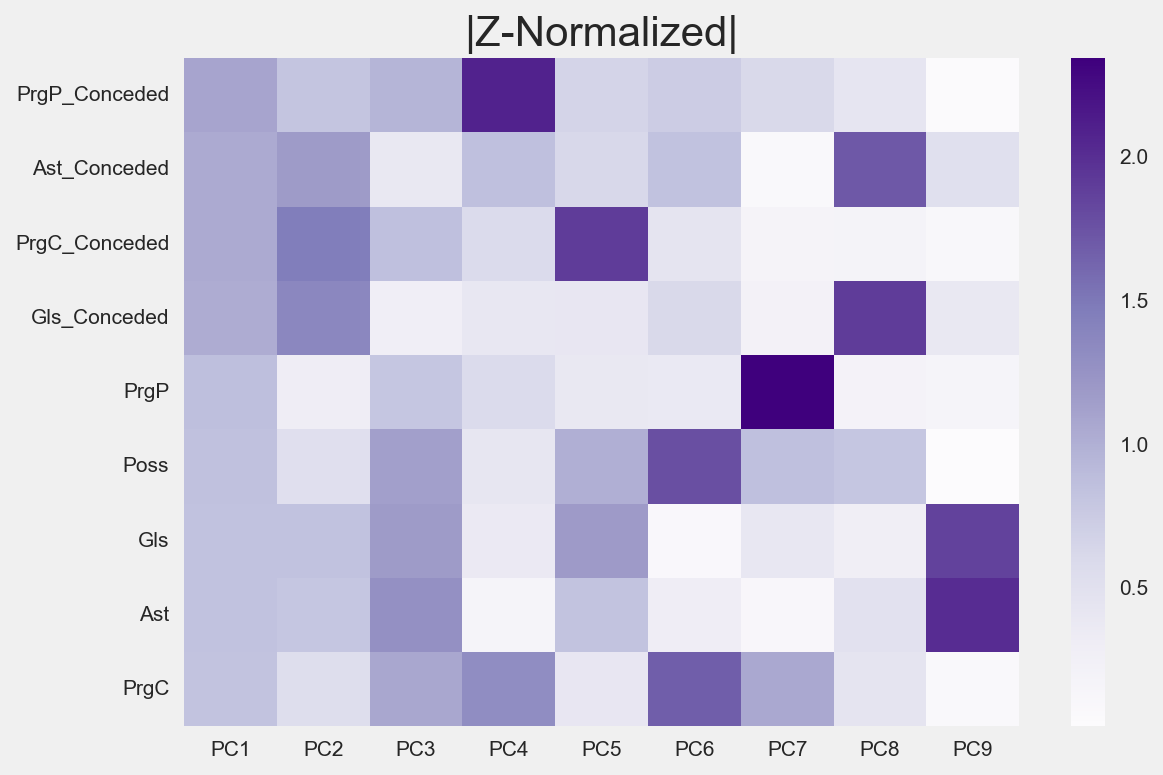

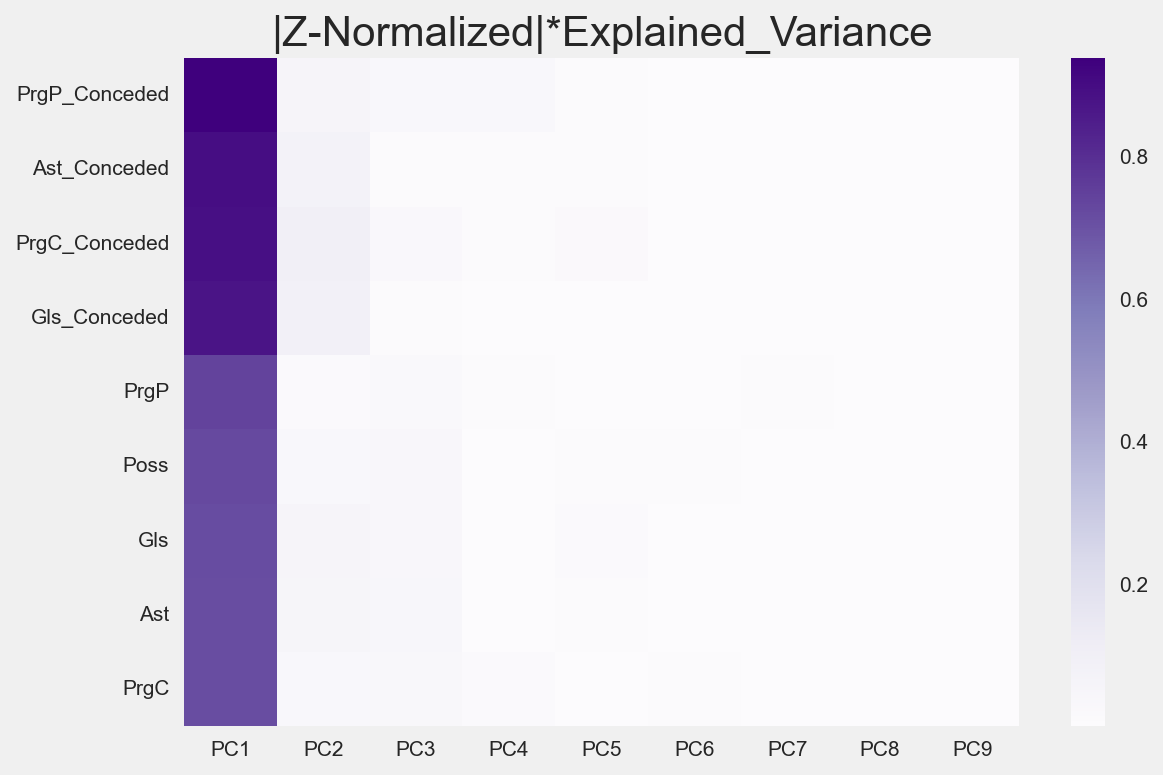

        score_       feature_
rank                         
1     1.077068  PrgP_Conceded
2     1.061273  PrgC_Conceded
3     1.018581   Ast_Conceded
4     1.000871   Gls_Conceded
5     0.839566            Gls
6     0.834636           Poss
7     0.832368            Ast
8     0.827624           PrgC
9     0.816721           PrgP


(           variance_cumulative  variance
 dimension                               
 1                     0.855038  0.855038
 2                     0.923340  0.068302
 3                     0.959654  0.036314
 4                     0.975918  0.016263
 5                     0.988930  0.013012
 6                     0.994028  0.005099
 7                     0.998037  0.004009
 8                     0.999400  0.001363
 9                     1.000000  0.000600,
 array([[ 2.77936547e+00,  1.63524591e-01,  3.69187021e-01,
          1.13903276e-01,  3.65296637e-01, -5.43863933e-02,
         -2.89748023e-01,  6.24979344e-02, -9.73119556e-03],
        [-6.44226862e-01, -4.19099695e-01,  3.29667522e-01,
         -3.85464881e-01, -3.81068788e-02, -1.72835234e-01,
         -1.11346406e-01,  1.93809000e-01,  4.26967781e-02],
        [-8.96353661e-01,  8.45510889e-01,  6.57590598e-01,
         -3.90800607e-01, -3.91927435e-01,  1.35930633e-02,
         -2.01084094e-01,  6.05950429e-02,  5.82900536e

In [135]:
# PCA analysis
from pca_analyzer import *

pca_full_report(X=scaled_X, features_=features)

In [136]:
# PCA to visualize
from sklearn.decomposition import PCA 
pca_teams = PCA(n_components=2)
principalComponents_teams = pca_teams.fit_transform(scaled_X)

pca_df = pd.DataFrame(data = principalComponents_teams, columns = ['PCA 1', 'PCA 2'])
pca_df.reset_index(inplace=True)


In [137]:
final_df = pd.merge(df_to_viz, pca_df, on='index')

In [140]:
# visualize using altair
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Team', 'cluster', 'Gls', 'Gls_Conceded',  'Poss', 'PCA 1', 'PCA 2']
).properties(
    width=600,
    height=400,
    title="The result of team clustering by Agglomerative method"
).configure_title(
        fontSize=24,
).configure_axis(
    labelFontSize=20,
    titleFontSize=24,
).configure_text(
    fontSize=20
).interactive()

alt.Chart(...)

In [142]:
# export csv file
final_df.to_csv(f'../datasets/labeled_after_clustering/agglomerative/final_result_team.csv')